# Linear Regression Programming Exercise

In [101]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
max = 10000

# Cost function with gradient minima search

In [102]:
def cost_function(x, y, theta):
    return(1/(2*data.shape[0]))*(np.subtract(x.dot(theta), y)).T.dot(np.subtract(x.dot(theta), y))

In [103]:
def cost_function_der(x, y, theta):
    return (x.T.dot(np.subtract(x.dot(theta), y)))/data.shape[0]

In [104]:
data = np.loadtxt('data/ex1data1.txt', delimiter = ',')

x = np.c_[np.ones(data.shape[0]), data[:, 0]]
y = np.c_[data[:, 1]]

# Batch Gradient Descent
inserire all'interno della funzione x(il dataset), y(il target), alpha(learning rate), max(numero iterazioni).

$\theta = \theta - \frac{\alpha}{m}(x^{T}(x\theta - y))$

$J_{history} = computeCost(x, y, \theta)$

In [106]:
def batch_gradient_descent(x, y, theta, alpha):
    theta = np.subtract(theta, (alpha/data.shape[0])*(x.T.dot(np.subtract(x.dot(theta), y))))
    return theta

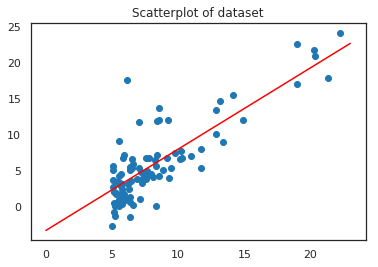

[[-3.24032519]
 [ 1.12718601]]


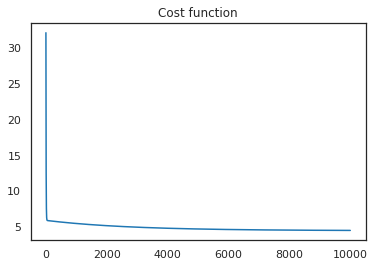

In [111]:
theta = np.zeros((2, 1))
last_cost = np.ones(max)

last_cost[0] = cost_function(x, y, theta)
alpha = 0.001

for i in range(1, max):
    theta = batch_gradient_descent(x, y, theta, alpha)
    #alpha = alpha / 2
    last_cost[i] = cost_function(x, y, theta)
    
plt.title("Scatterplot of dataset")
plt.scatter(x[:, 1], y)
plt.plot(np.arange(0, 24) * theta[1] + theta[0], 'r')
plt.show()
print(theta)

plt.title("Cost function")
plt.plot(last_cost)

# Stimiamo la nostra ipotesi

In [112]:
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[7048.25850142]
[46499.76886077]


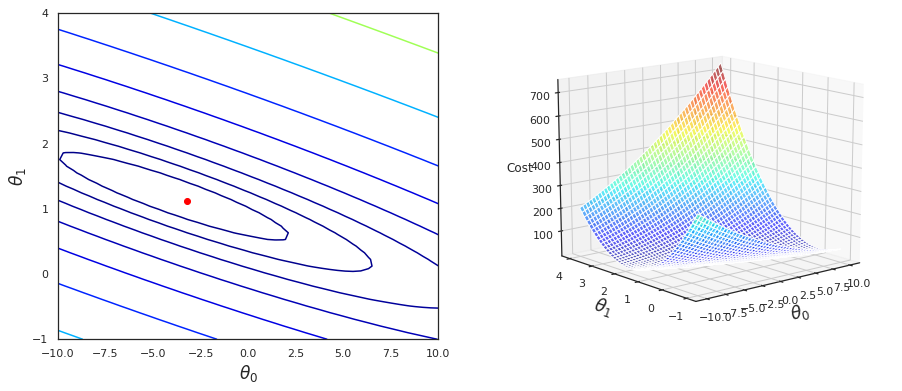

In [115]:
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = cost_function(x, y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

# Analisi multivariata